#### SUMMARY

Gold Atlantis, a credit-providing firm, observed a rise in the number of defaulters.Now, the firm is only interested in those consumers who have a lower probability of becoming a defaulter.

When Gold Atlantis recieves a credit application, it approves or disapproves the application based on the applicant's profile.

However, there are two types of risks that are associated with the firm decisions:

If the applicant is likely to repay the loan, then disapproving the loan may result in a loss of business to the firm.
If the applicant is not likely to repay the loan, that is, if the applicant is a defaulter, then approving the loan may lead to a financial loss to the firm.

#### The main aim of this case study is to help firm identify the customers who have a lower probability of becoming a defaulter.

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np      
import statistics as st
import warnings
warnings.filterwarnings('ignore')
print("Imported the required packages")

Imported the required packages


In [2]:
df = pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [4]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() <= 30:      
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


#### Level Data Understanding

* Level 0: Understanding the Data
* Level 1: Univariate Data Analysis
* Level 2: Bivariate Dat Analysis
* Level 3: Multivariate Analysis

#### Level 0 : Understanding data
1. Visually inspect first and last few rows of the data
2. Check the shape of the dataframe
3. check the count of null values in each columns
4. inspect all the column names and cross check with data dictionary
5. Check the information of the dataframe using info function

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [6]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [7]:
df.shape

(100000, 24)

In [8]:
df.info

<bound method DataFrame.info of        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
0          100002       1         Cash loans      M   N     Y             0   
1          100003       0         Cash loans      F   N     N             0   
2          100004       0    Revolving loans      M   Y     Y             0   
3          100006       0         Cash loans      F   N     Y             0   
4          100007       0         Cash loans      M   N     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99995      216086       0         Cash loans      F   N     Y             1   
99996      216087       0         Cash loans      F   N     Y             1   
99997      216088       0         Cash loans      F   Y     Y             0   
99998      216089       0         Cash loans      F   Y     N             0   
99999      216090       0    Revolving loans      M   Y     Y             0   

       AMT_INCOME_T

In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


##### By describing (), you will get all the statistical information for the numeric columns and get an idea about their distribution and outliers.

In [10]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

#### Filling the missing values in columns:
* AMT_GOODS_PRICE 
* NAME_TYPE_SUITE 
* OCCUPATION_TYPE       
* CNT_FAM_MEMBERS

In [11]:
# Treating null values with mean values of the column
df["AMT_GOODS_PRICE"].fillna(value =df["AMT_GOODS_PRICE"].mean(),inplace = True)

In [12]:
mode_value = df["NAME_TYPE_SUITE"].mode()[0]

# Fill missing values with the mode value
df["NAME_TYPE_SUITE"].fillna(value=mode_value, inplace=True)


In [13]:
mode_value = df["OCCUPATION_TYPE"].mode()[0]

# Fill missing values with the mode value
df["OCCUPATION_TYPE"].fillna(value=mode_value, inplace=True)


In [14]:
df["CNT_FAM_MEMBERS"].fillna(value =df["CNT_FAM_MEMBERS"].mean(),inplace = True)

In [15]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [16]:
# Checking if there are any duplicate values and removing them.
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    df.drop_duplicates(inplace = True)
    print("Removed all the duplicate values from the data")
else:
    print("No duplicate rows found")

No duplicate rows found


In [17]:
##### Replacing the values to make it eay to understand

In [18]:
#### Target column: Replaced 0 with payers and 1 with defaulters to make it understandable.

In [19]:
df['TARGET'] = df['TARGET'].replace({0:'Payers', 1:'Defaulters'})

In [20]:
df['MOBILE'] = df['MOBILE'].replace({0:'No', 1:'Yes'})

In [21]:
df['WORK_PHONE'] = df['WORK_PHONE'].replace({0:'No', 1:'Yes'})

In [22]:
df['HOME_PHONE'] = df['HOME_PHONE'].replace({0:'No', 1:'Yes'})

In [23]:
df['MOBILE_REACHABLE'] = df['MOBILE_REACHABLE'].replace({0:'No', 1:'Yes'})

In [24]:
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].replace({0:'No', 1:'Yes'})

In [108]:
mode_value = df['GENDER'].mode()[0]
df['GENDER'] = df['GENDER'].replace('XNA', mode_value)

In [25]:
#### Family status column : Replaced the 'Unknown' with mode of the data('Married') to reduce complexity.

In [26]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace({'Unknown':'Married'})

In [27]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace({'Family':'accompanied','Spouse, partner':'accompanied','Children':'accompanied','Other_A':'accompanied','Other_B':'accompanied','Group of people':'accompanied' })

In [28]:
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace({'State servant':'Working', 'Commercial associate':'Working'})
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace({'Student':'Unemployed','Businessman':'Working','Maternity leave':'Working'})

In [29]:
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace({'Academic degree': 'Higher education','Incomplete higher': 'Higher education'})

In [30]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,Defaulters,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,Yes,Yes,No,Yes,No,Laborers,1.0,WEDNESDAY,1
1,100003,Payers,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,Yes,Yes,No,Yes,No,Core staff,2.0,MONDAY,1
2,100004,Payers,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,Yes,Yes,Yes,Yes,No,Laborers,1.0,MONDAY,0
3,100006,Payers,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,Yes,Yes,No,Yes,No,Laborers,2.0,WEDNESDAY,1
4,100007,Payers,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,Yes,Yes,No,Yes,No,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,Payers,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,Yes,Yes,Yes,Yes,No,Sales staff,3.0,MONDAY,1
99996,216087,Payers,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,Yes,Yes,No,Yes,No,Managers,3.0,TUESDAY,1
99997,216088,Payers,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,Yes,Yes,No,Yes,No,Sales staff,2.0,TUESDAY,1
99998,216089,Payers,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,Yes,Yes,No,Yes,No,Sales staff,2.0,FRIDAY,2


In [31]:
## Count of children column: Removed outliers to improve data quality and consistency.
## Count of family members: Removed outliers for enhanced data reliability and consistency.

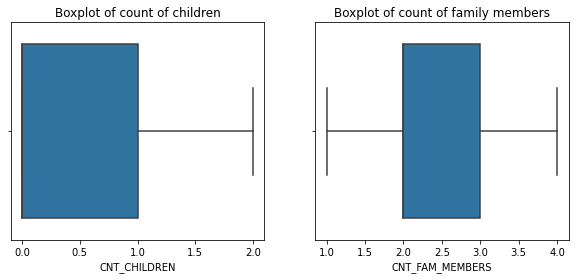

In [35]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.boxplot(x = df['CNT_CHILDREN'], ax= ax[0])
ax[0].set_title("Boxplot of count of children")
sns.boxplot(x = df['CNT_FAM_MEMBERS'], ax= ax[1])
ax[1].set_title("Boxplot of count of family members")
plt.show()

In [36]:
df = df[(df['CNT_CHILDREN']<=2) & (df['CNT_FAM_MEMBERS']<=4)]

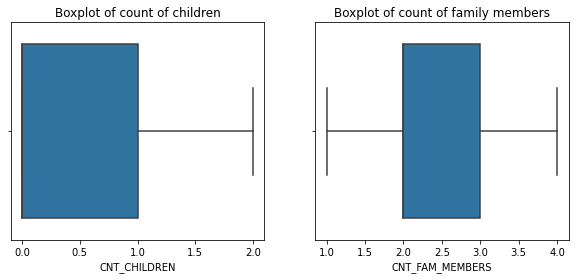

In [37]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.boxplot(x = df['CNT_CHILDREN'], ax= ax[0])
ax[0].set_title("Boxplot of count of children")
sns.boxplot(x = df['CNT_FAM_MEMBERS'], ax= ax[1])
ax[1].set_title("Boxplot of count of family members")
plt.show()

In [38]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() <= 30:      
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


####  ANALYE PHASE & SHARE PHASE
* We will analyze the banks credit data to help the bank find the clients with a low probability of becoming defaulters.

##### Factors influencing Defaulters

To begin with, let's examine the factors that are influencing the defaulters

In [39]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

#### Univariate and Bivariate Analysis

Univariate analysis examines one variable's distribution or characteristics to gain insights into its behavior.

Bivariate analysis studies the relationship between two variables to identify patterns or dependencies between them in a dataset or context.

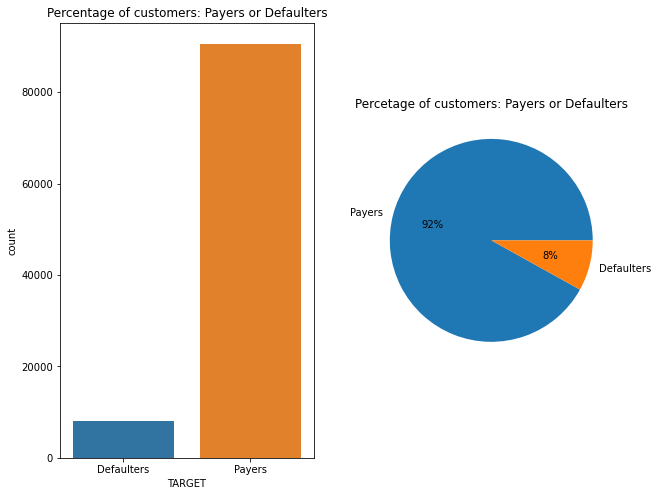

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
ax[0].set_title("Percentage of customers: Payers or Defaulters")                  # Set the title of the graph
percentage = df["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["TARGET"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.0f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 
plt.title('Percetage of customers: Payers or Defaulters')
plt.show()



##### Interpretation: There are 92% payers and 8% defaulters.

#### Defining a function that can give us the graphs that are needed for univariate and bivariate analysis.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_data(df, column1, column2=None):
    plt.figure(figsize=(8, 5))
    
    if column2 is None:
        if df[column1].dtype == 'object':
            sns.countplot(data=df, x=column1)
            plt.title(f'Count of {column1}')
            plt.xticks(rotation=45)
        else:
            sns.histplot(data=df, x=column1, kde=True)
            plt.title(f'Distribution of {column1}')
    else:
        if df[column1].dtype == 'object' and df[column2].dtype == 'object':
            sns.countplot(data=df, x=column1, hue=column2)
            plt.title(f'Count of {column1} by {column2}')
            plt.xticks(rotation=45)
            plt.legend(title=column2)
        elif df[column1].dtype == 'object' and df[column2].dtype != 'object':
            sns.boxplot(data=df, x=column1, y=column2)
            plt.title(f'{column1} vs. {column2}')
            plt.xticks(rotation=45)
        elif df[column1].dtype != 'object' and df[column2].dtype == 'object':
            sns.boxplot(data=df, x=column2, y=column1)
            plt.title(f'{column2} vs. {column1}')
            plt.xticks(rotation=45)
        else:
            sns.scatterplot(data=df, x=column1, y=column2)
            plt.title(f'Scatter plot: {column1} vs. {column2}')
    
    if df[column1].dtype == 'object':
        pie_data = df[column1].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(pie_data, labels=pie_data.index, autopct='%.0f%%', startangle=140)
        plt.title(f'Distribution of {column1}')
        
    plt.show()
 

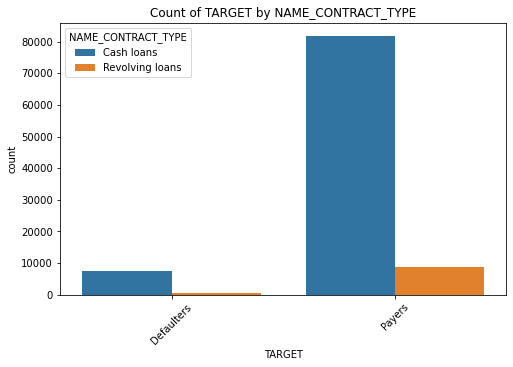

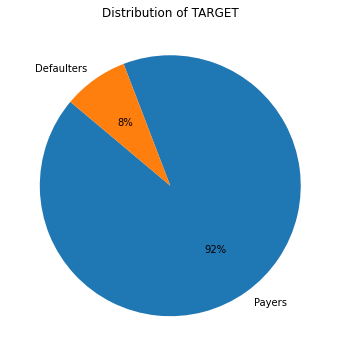

In [42]:
analyze_data(df,'TARGET','NAME_CONTRACT_TYPE')

###### Interpretation: People are taking more cash loans. People who take revolving loans have less defaulters.

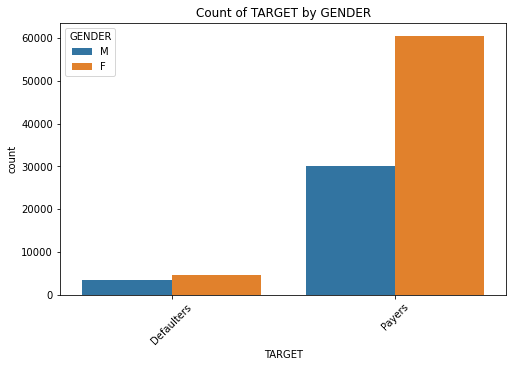

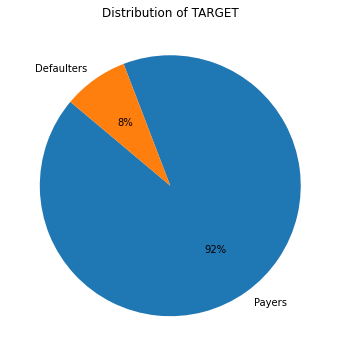

In [109]:
analyze_data(df, 'TARGET','GENDER')

##### Interpretation: Females take more loans as compared to males but males are the one who comes under defaulters.

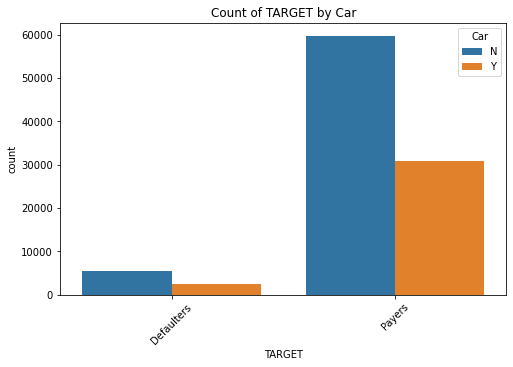

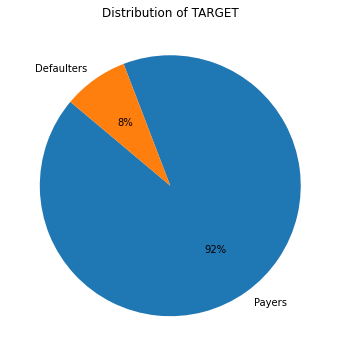

In [44]:
analyze_data(df,'TARGET','Car')

##### Interpretation: People who don't own a car are taking more loans.

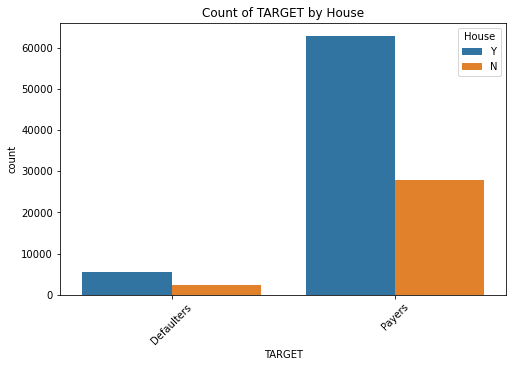

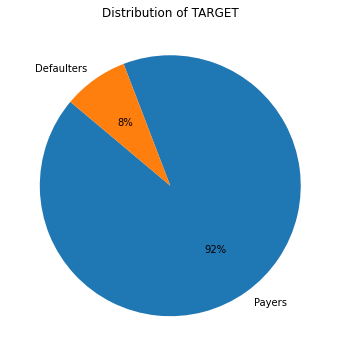

In [45]:
analyze_data(df,'TARGET','House')

##### Interpretation: People who own a house are taking more loans than people who don't own a house.

0    70.975268
1    20.313863
2     8.710869
Name: CNT_CHILDREN, dtype: float64


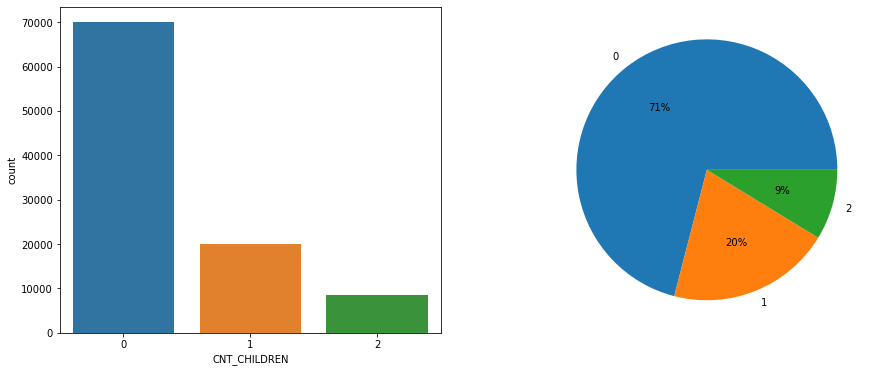

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
percentage = (df["CNT_CHILDREN"].value_counts()/len(df))*100    
                                                                       
print(percentage)
sns.countplot(x = df["CNT_CHILDREN"], ax = ax[0])
labels = list(df["CNT_CHILDREN"].value_counts().index)            
                                                                         
ax[1].pie(percentage,labels = labels, autopct= "%0.0f%%")         
plt.show()



##### Interpretation: People with no children are taking more loans than those with the children.

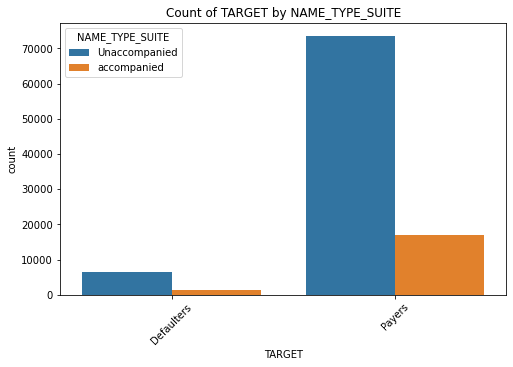

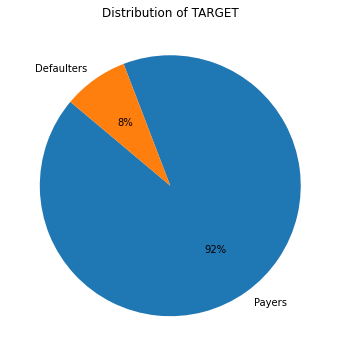

In [47]:
analyze_data(df,'TARGET','NAME_TYPE_SUITE')

##### Interpretation: People who are unaccompanied are mostly taking loans and the number of defaulters is more in people who are unaccompanied.

Working       81.906713
Pensioner     18.074012
Unemployed     0.019274
Name: NAME_INCOME_TYPE, dtype: float64


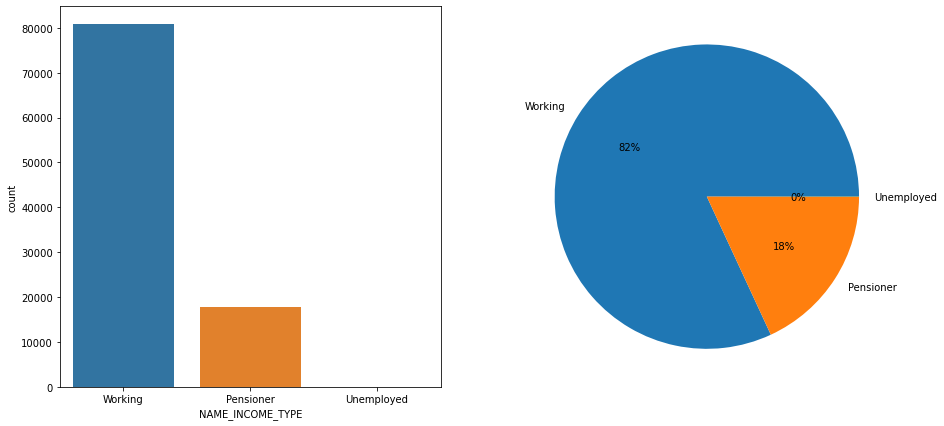

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
percentage = (df["NAME_INCOME_TYPE"].value_counts()/len(df))*100    
                                                                       
print(percentage)
sns.countplot(x = df["NAME_INCOME_TYPE"], ax = ax[0])
labels = list(df["NAME_INCOME_TYPE"].value_counts().index)            
                                                                         
ax[1].pie(percentage,labels = labels, autopct= "%0.0f%%")         
plt.show()



##### Interpretation: People who are working take more loans than pensioners. Unemployed people doesn't take any loans.

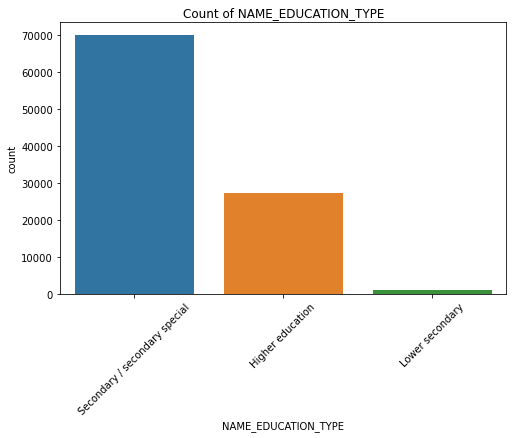

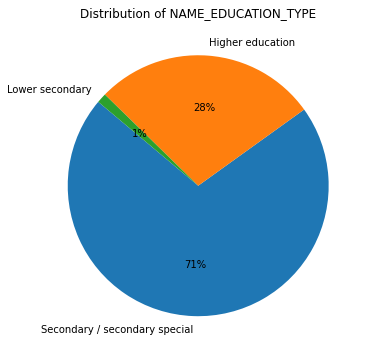

In [49]:
analyze_data(df,'NAME_EDUCATION_TYPE')

##### Interpretation: People with secondary education take more loans. People with lower secondary education take less loans. Only 1% of the people from lower secondary take loans.

In [106]:
def categorize_occupation(occupation):
    if occupation in ['Laborers', 'Drivers','Cleaning staff', 'Cooking staff', 'Low-skill Laborers',
                      'Waiters/barmen staff','Security staff']:
        return 'Non- professionals'
    else:
        return 'Professionals'

df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].map(categorize_occupation)

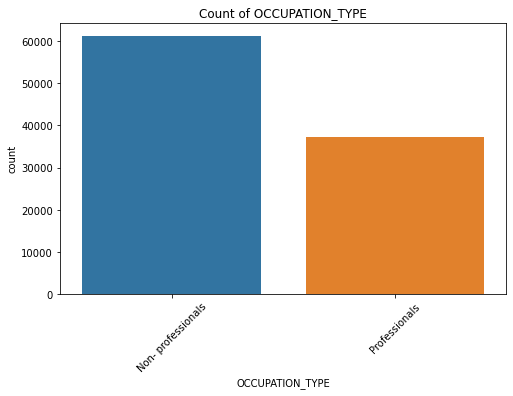

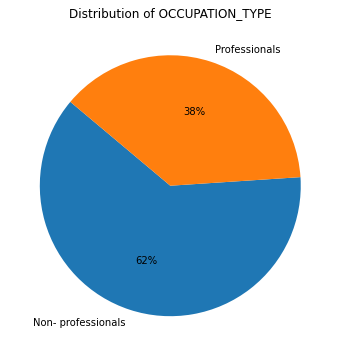

In [107]:
analyze_data(df,'OCCUPATION_TYPE')

##### Interpretation: Number of non-professionals taking loans is more than professionals. So, number of defaulters are more in non-professionals.


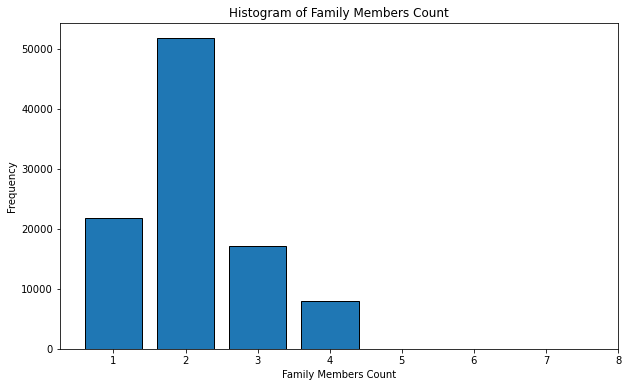

In [56]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a histogram
plt.hist(df["CNT_FAM_MEMBERS"], bins=range(1, 9), align='left', rwidth=0.8, edgecolor='black')

# Set labels and title
plt.xlabel("Family Members Count")
plt.ylabel("Frequency")
plt.title("Histogram of Family Members Count")

# Set the x-axis ticks to integers (if they aren't already)
plt.xticks(range(1, 9))

# Show the histogram
plt.show()

##### Interpretation: People with 2 family members are taking more loans.

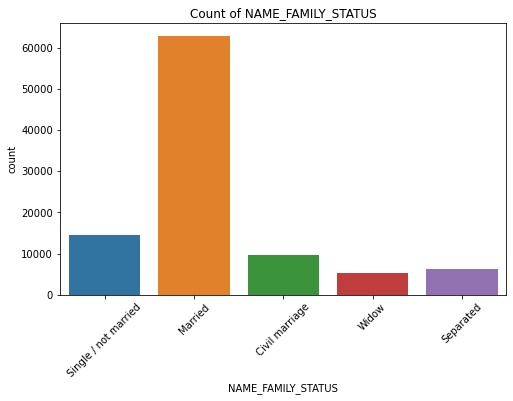

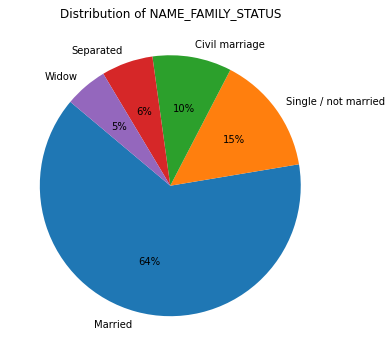

In [51]:
analyze_data(df,'NAME_FAMILY_STATUS')

###### Interpretation: Married people take more loans than the others.

In [65]:
# Convert the 'AMT_INCOME_TOTAL' column to int
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].astype(int)

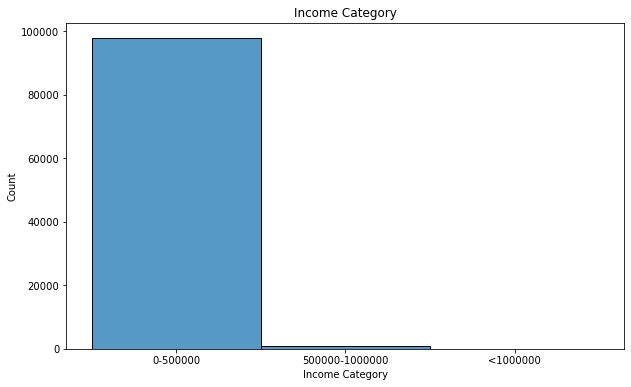

In [72]:
# Define bins and labels with a large finite number
max_value = 1e10  # You can use any sufficiently large number
bins = [0, 500000, 1000000, max_value]
labels = ['0-500000', '500000-1000000', '<1000000']
df['income range'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='income range')
plt.title('Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')

plt.show()

##### Interpretation: Almost all the people who take loans are in the income range of 0-500000 lakhs.

#### Multivariate Analysis

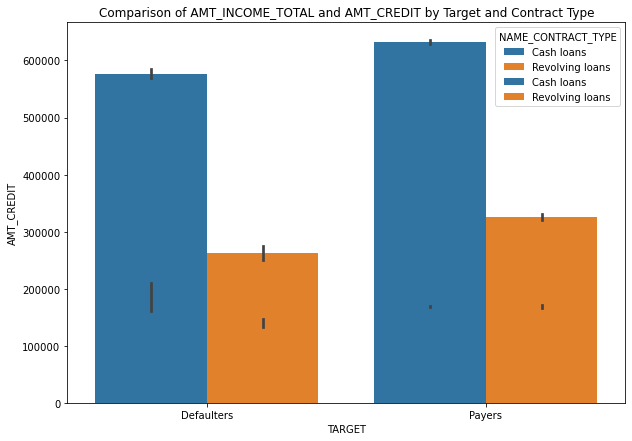

In [94]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = "TARGET", y= "AMT_INCOME_TOTAL", hue = "NAME_CONTRACT_TYPE", data = df)
sns.barplot(x = "TARGET", y= "AMT_CREDIT", hue = "NAME_CONTRACT_TYPE", data = df)
plt.title("Comparison of AMT_INCOME_TOTAL and AMT_CREDIT by Target and Contract Type")
plt.show()

##### Interpretation: The people are given way more credit than their income in cash loans. So there are more defaulters in people taking cash loans.

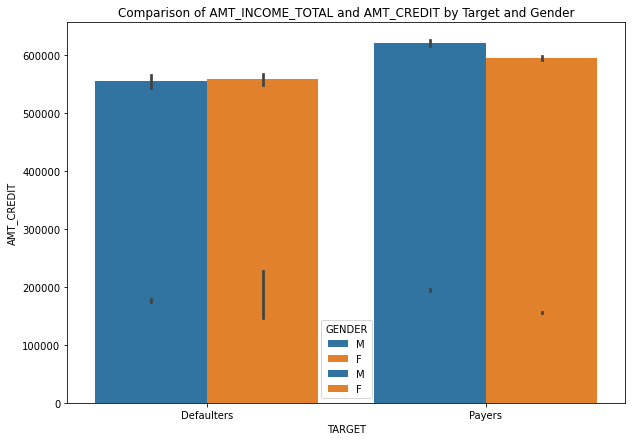

In [110]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = "TARGET", y= "AMT_INCOME_TOTAL", hue = "GENDER", data = df)
sns.barplot(x = "TARGET", y= "AMT_CREDIT", hue = "GENDER", data = df)
plt.title("Comparison of AMT_INCOME_TOTAL and AMT_CREDIT by Target and Gender")
plt.show()

##### Interpretation: Though men and women are given the similar amounts of credits female are able to pay but not males, which means we need to analyse if there are any schemes that are being provided to females.

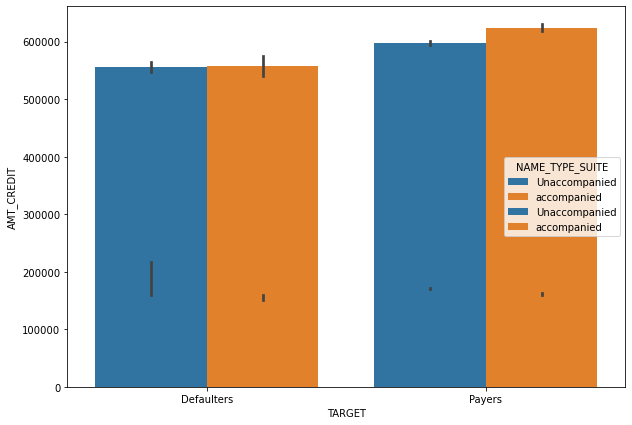

In [96]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = "TARGET", y= "AMT_INCOME_TOTAL", hue = "NAME_TYPE_SUITE", data = df)
sns.barplot(x = "TARGET", y= "AMT_CREDIT", hue = "NAME_TYPE_SUITE", data = df)
plt.show()

##### Interpretation: Of all the others the amount of credit taken by people who are accompanied by group of people is less. So there are less defaulters in them.

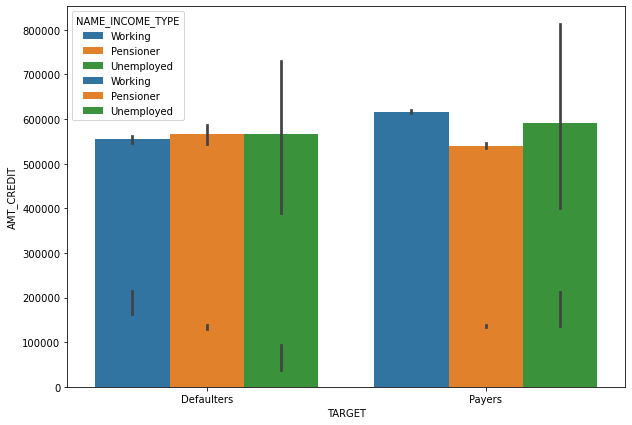

In [97]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = "TARGET", y= "AMT_INCOME_TOTAL", hue = "NAME_INCOME_TYPE", data = df)
sns.barplot(x = "TARGET", y= "AMT_CREDIT", hue = "NAME_INCOME_TYPE", data = df)
plt.show()

##### Interpretation: Pensioners are taking less credit compared to others. So there are few number of defaulters in them.

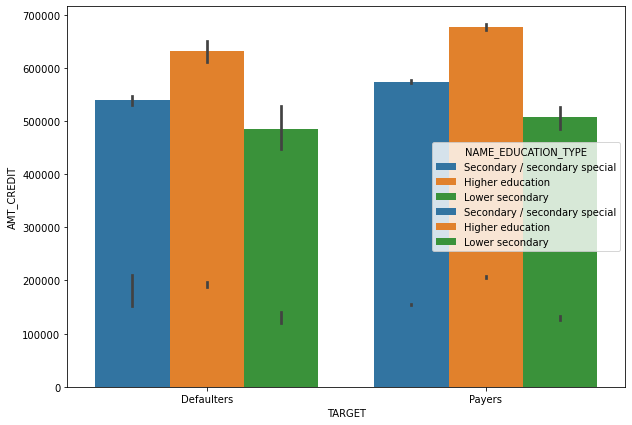

In [98]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = "TARGET", y= "AMT_INCOME_TOTAL", hue = "NAME_EDUCATION_TYPE", data = df)
sns.barplot(x = "TARGET", y= "AMT_CREDIT", hue = "NAME_EDUCATION_TYPE", data = df)
plt.show()

##### Interpretation: Though people having higher education are giving more credit than their income they are having less defaulters. so we need to analyse if they were being given any advantages by their companies they are working in.

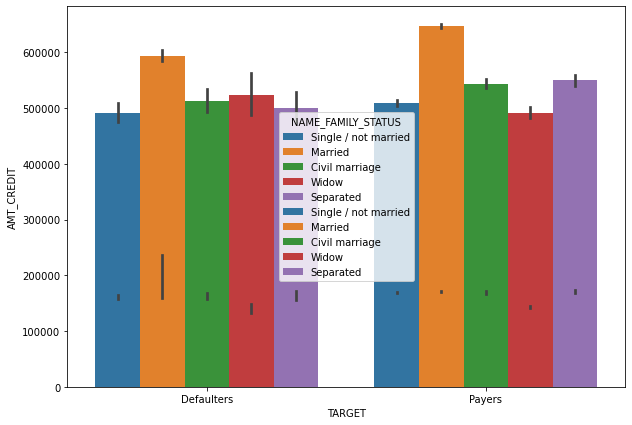

In [99]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = "TARGET", y= "AMT_INCOME_TOTAL", hue = "NAME_FAMILY_STATUS", data = df)
sns.barplot(x = "TARGET", y= "AMT_CREDIT", hue = "NAME_FAMILY_STATUS", data = df)
plt.show()

##### Interpretation: As widows are taking less amount of credit compared to others. So there are few defaulters.

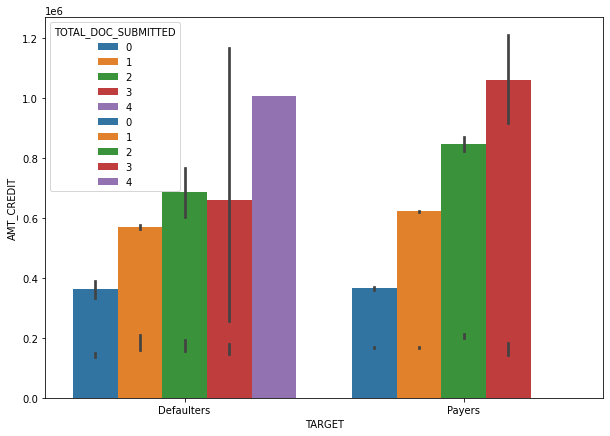

In [100]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = "TARGET", y= "AMT_INCOME_TOTAL", hue = "TOTAL_DOC_SUBMITTED", data = df)
sns.barplot(x = "TARGET", y= "AMT_CREDIT", hue = "TOTAL_DOC_SUBMITTED", data = df)
plt.show()

##### Interpretation: Though the amount credit is way more than income in people submitting more than 2 documents but there are few defaluters. So we need to analyse the documents that are submitted.

### Conclusion:

#### Univariate and Bivariate Analysis Insights:

1. Loan Type and Default Rates:
    * Cash loans have a higher percentage of defaulters compared to revolving loans, indicating that borrowers with revolving         loans are more likely to meet their repayment obligations. 
    
    
2. Gender and Default Rates:
    * Males have a higher default rate compared to females, suggesting that women are more reliable borrowers when it comes to        loan repayments.
    
    
3. Family Size and Default Rates:
    * Individuals with no children tend to default less compared to those with a single child. This implies that having no             children may provide borrowers with more financial stability, making them better candidates for loans.
    
    
4. Employment Status and Default Rates:
    * Working individuals have a lower default rate than pensioners and the unemployed. 


5. Educational Background and Default Rates:
    * Borrowers with secondary education have a higher default rate compared to those with higher education. T
    

6. Occupational Skill Level and Default Rates:
     * Unskilled workers have a higher default rate compared to skilled workers. 


7. Document Requirements and Default Rates:
      * Borrowers with fewer than or equal to one document have a higher default rate than those with two or more documents.             This suggests that providing more documentation during the loan application process might be associated with lower               default risk, possibly indicating greater transparency in financial matters.
      

8.  Marital Status and Default Rates:
     * Single individuals have a higher default rate compared to married individuals and widows. This could be because married          individuals may have dual sources of income or financial support systems that reduce their default risk.
     

9. Car Ownership and Default Rates:
     * The similarity in default rates between those who do not own a car and those who do suggests that car ownership may not          be a significant factor in determining loan default risk.
     

10. Home Ownership and Default Rates:
     * The similarity in default rates among those who own a house indicates that home ownership alone may not be a strong              indicator of loan repayment reliability.
     

11.  Family Accompaniment and Default Rates:
     * The similarity in default rates between those who are accompanied and those who are not suggests that having family              members may not significantly impact loan default risk.
     

12. Family Size and Default Rates:
    * The similarity in default rates for borrowers with two family members suggests that the size of the family unit might not       be a key factor in loan default risk for this specific group.



#### Multivariate Analysis Insights:
1. High Credit vs. Income in Cash Loans:
    * People taking cash loans are often extended credit amounts that exceed their income levels, leading to a higher incidence       of defaulters in this category. Lenders should reconsider the credit limits they offer to align with borrowers' income           capacity.
    
    
2. Gender Disparity in Repayment:
    * While men and women are offered similar credit amounts, females tend to have a better repayment record.
    
    
3. Credit and Company Advantages:
     * Borrowers with higher education levels often receive more credit than their income suggests, yet they have lower default        rates. Further it needs to be analyzed whether they have an advantage of their workplace or not.
     
     
4. Default Risk of Pensioners:
      * Pensioners tend to take out smaller loans compared to other groups, resulting in a lower number of defaulters. This             implies that pensioners are cautious borrowers, possibly due to their fixed income. 
      
      
5. Effect of Document Submission:
      * Borrowers submitting more than two documents, despite having credit amounts significantly exceeding their income, have a         lower default rate. This highlights the importance of the documents provided during the loan application process to             identify factors contributing to their lower default rates.
      
     
6. Impact of Group Accompaniment:
      * Borrowers who are accompanied by a group of people receive lower credit amounts, which may be attributed to collective           accountability. Consequently, this group experiences fewer defaulters.
      
      
7. Widows and Conservative Borrowing:
      * Widows tend to borrow smaller amounts compared to other groups, resulting in fewer defaulters. 
      
      
##### In summary, these insights indicate that various demographic and financial factors can influence the likelihood of loan default. Lenders should consider these factors when evaluating loan applications and setting interest rates to mitigate default risk effectively.